VGG16

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/train',
target_size=(150,150),
batch_size=32,
class_mode='categorical',
 shuffle=True
 )

validation_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/val',
target_size=(150,150),
batch_size=32,
class_mode='categorical',shuffle=True
)
test_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/test',
)

Found 3454 images belonging to 4 classes.
Found 431 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


In [ ]:
########### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# Define the number of layers to freeze (e.g., the first 15 layers)
num_layers_to_freeze = 15

# Freeze the weights of the first num_layers_to_freeze layers
for layer in conv_base.layers[:num_layers_to_freeze]:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4,activation='softmax'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16813124 (64.14 MB)
Trainable params: 9177860 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

# Define the SGD optimizer with a learning rate (e.g., 0.01)
sgd_optimizer = optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd_optimizer,
             metrics=['acc'])


In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/CNN Banana(80-20)/checkpointcb")



In [ ]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 [==============================] - 109s 23s/step - loss: 1.4321 - acc: 0.3000 - val_loss: 1.4292 - val_acc: 0.2812
Epoch 2/100
5/5 [==============================] - 141s 31s/step - loss: 1.4049 - acc: 0.3250 - val_loss: 1.3758 - val_acc: 0.3187
Epoch 3/100
5/5 [==============================] - 140s 31s/step - loss: 1.4023 - acc: 0.3375 - val_loss: 1.3605 - val_acc: 0.3375
Epoch 4/100
5/5 [==============================] - 141s 31s/step - loss: 1.3832 - acc: 0.3481 - val_loss: 1.3286 - val_acc: 0.4125
Epoch 5/100
5/5 [==============================] - 136s 30s/step - loss: 1.3479 - acc: 0.3875 - val_loss: 1.2678 - val_acc: 0.4125
Epoch 6/100
5/5 [==============================] - 139s 31s/step - loss: 1.3460 - acc: 0.3500 - val_loss: 1.3084 - val_acc: 0.4313
Epoch 7/100
5/5 [==============================] - 138s 31s/step - loss: 1.3278 - acc: 0.3625 - val_loss: 1.1839 - val_acc: 0.5375
Epoch 8/100
5/5 [==============================] - 140s 31s/step - loss: 1.2661 - a

In [ ]:
model.save('my_modelvgg16.keras')

In [ ]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN Banana/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for test data
)

# Make predictions on the test data
test_predictions = model.predict(test_generator)


Found 435 images belonging to 4 classes.
14/14 [==============================] - 143s 10s/step


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the true labels from the test generator
true_labels = test_generator.classes

In [ ]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

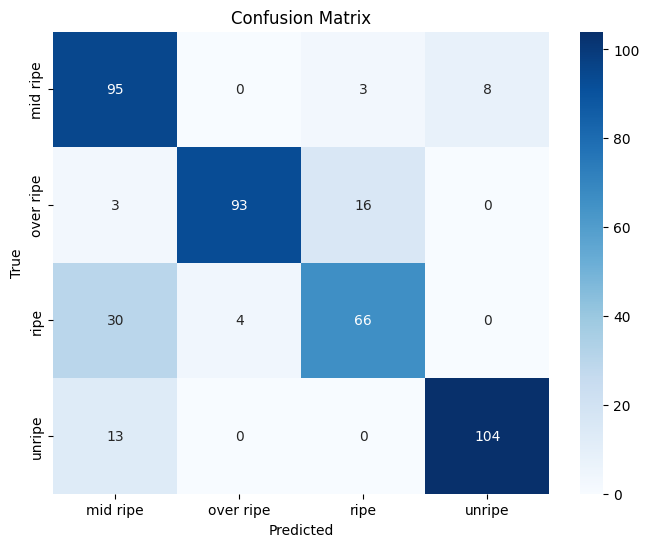

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
# Number of classes
num_classes = 4  # Change this to match your number of classes

# Convert true labels to one-hot encoding
true_labels_one_hot = label_binarize(true_labels, classes=range(num_classes))

In [ ]:
# Calculate predicted probabilities for each class
predicted_probabilities = model.predict(test_generator)

14/14 [==============================] - 123s 9s/step


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


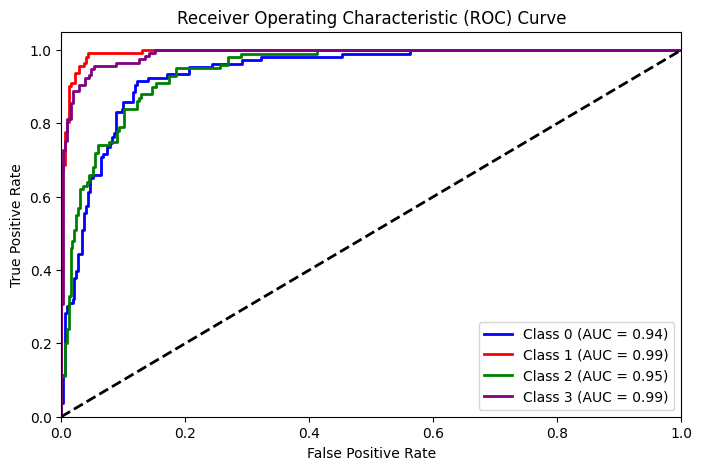

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 5))
colors = cycle(['blue', 'red', 'green', 'purple'])  # Change or add more colors as needed

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()